In [1]:
import os
import json
import time
import pandas as pd
from src.vycisti import vycisti
from src.tabulka import tabulka
pd.set_option('display.max_columns', None)
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
df = vycisti(pd.read_json(os.path.join("data", "filmy.json")), opravy)
pisne = pd.read_json(os.path.join("data", "pisne.json"))

2023/06/23 22:06:47 z 4555 řádků odstraněno 133. Aktuální dataframe má 4422 řádků.


In [2]:
df = df[["Film","Copyright","Délka","Typologie","Písně","Režie","Žánr","Originální název"]]

In [3]:
pisne = pisne.merge(df, on="Film")

In [4]:
pisne.sample(10)

,Film,Píseň,Hudba k písni,Text písně,Zpívá,Copyright,Délka,Typologie,Písně,Režie,Žánr,Originální název
4760,Pumpaři od Zlaté podkovy (397191),Rikatado,Bob Hurikán (126422),Bob Hurikán (126422),None,1978,dlouhometrážní,"[hraný, distribuční]","[Mám zlatej důl, Tvůj stín se má, Já jsem všec...",[Otakar Fuka (1985)],kriminální,Pumpaři od Zlaté podkovy
9170,Mstitel (402140),Kazačok,None,None,None,2021,dlouhometrážní,"[hraný, distribuční]","[Diskotéka, Hej!, Žal se odkládá, Popcorn, Zma...",[Lucia Klein Svoboda (19838)],"[komedie, parodie, bláznivá komedie]",Mstitel
1849,Rozkošný příběh (395729),"Dřív, než se rozejdeme /Neboj se rozloučení/",Josef Stelibský (31111),"[Jaroslav Mottl (55549), Karel Melíšek (127503)]","[Zita Kabátová (839), František Krištof-Veselý...",1936,dlouhometrážní,"[hraný, distribuční]","[Podej štěstí ruku (valčík), Dřív, než se roze...",[Vladimír Slavínský (31967)],komedie,Rozkošný příběh
1620,Dům na předměstí (395617),Když člověk na světě je jenom sám,Julius Kalaš (11040),Karel Hrnčíř (129793),Hugo Haas (37289),1933,dlouhometrážní,"[hraný, distribuční]","[Kdybych měl kamna s plotnou, Sviňme věnce, Kd...",[Miroslav Cikán (31969)],komedie,Dům na předměstí
3180,První parta (396362),Stavěli tesaři zedníkům lešení,None,None,None,1959,dlouhometrážní,"[hraný, distribuční]","[Stavěli tesaři zedníkům lešení, Buď sbohem, m...",[Otakar Vávra (9507)],drama,První parta
1109,Doblba! (36725),Koledy,None,None,"[Roman Holý (5129), Iva Brzáková (22885), Zuza...",2005,dlouhometrážní,"[hraný, distribuční]","[Koledy, Zambrasong, Moj Świat, Crushing Bliss...",[Petr Vachler (3525)],"[komedie, černá komedie]",Doblba!
710,Pupendo (18262),"Ó, chlapíku statečný",Josef Laufer (9729),Josef Laufer (9729),None,2003,dlouhometrážní,"[hraný, distribuční]","[Zmrzlinář, Zahrada ticha, Blaničtí rytíři, Co...",[Jan Hřebejk (4831)],"[komedie, hořká komedie]",Pupendo
9820,Pouta (80516),Bitva na Tursku,Oldřich Janota (26618),Oldřich Janota (26618),Oldřich Janota (26618),2010,dlouhometrážní,"[hraný, distribuční]","[Pikola, I Found a Reason, Nebo jíti jest Hosp...",[Radim Špaček (496)],"[psychologický, thriller]",Pouta
5286,Poslední vlak (397385),Docela všední den,Jan Hammer (126512),None,Vlasta Průchová (129741),1982,dlouhometrážní,"[hraný, distribuční]","[Blues pro tebe, Ona je krásná jak štěstí, Plu...",[Julius Matula (14163)],příběh,Poslední vlak
7613,Skokan (401277),Hawa Mayal,None,None,None,2017,dlouhometrážní,"[hraný, distribuční]","[Hawa Mayal, Alagi Rohi, Il mio amico speciale...",[Petr Václav (486)],"[psychologický, road movie]",Skokan


In [5]:
pisne = pisne.explode("Hudba k písni").explode("Text písně").explode("Zpívá").explode("Žánr").explode("Režie")

In [6]:
pisne[pisne["Zpívá"].str.contains("Such",na=False)]

,Film,Píseň,Hudba k písni,Text písně,Zpívá,Copyright,Délka,Typologie,Písně,Režie,Žánr,Originální název
10,Občanský průkaz (103354),Krajina posedlá tmou,Jiří Šlitr (2822),Jiří Suchý (2270),Jiří Suchý (2270),2010,dlouhometrážní,"[hraný, distribuční]","[Most of the Time, Obut a oblečen, Paranoid, B...",Ondřej Trojan (1348),historický,Občanský průkaz
10,Občanský průkaz (103354),Krajina posedlá tmou,Jiří Šlitr (2822),Jiří Suchý (2270),Jiří Suchý (2270),2010,dlouhometrážní,"[hraný, distribuční]","[Most of the Time, Obut a oblečen, Paranoid, B...",Ondřej Trojan (1348),komedie,Občanský průkaz
10,Občanský průkaz (103354),Krajina posedlá tmou,Jiří Šlitr (2822),Jiří Suchý (2270),Jiří Suchý (2270),2010,dlouhometrážní,"[hraný, distribuční]","[Most of the Time, Obut a oblečen, Paranoid, B...",Ondřej Trojan (1348),hořká komedie,Občanský průkaz
371,Oběti a vrazi (15294),Pramínek vlasů,Jiří Suchý (2270),Jiří Suchý (2270),Jiří Suchý (2270),2000,dlouhometrážní,"[hraný, distribuční]","[Pramínek vlasů, Oči má sněhem zaváté, Zčerven...",Andrea Sedláčková (4786),drama,Oběti a vrazi
371,Oběti a vrazi (15294),Pramínek vlasů,Jiří Suchý (2270),Jiří Suchý (2270),Jiří Suchý (2270),2000,dlouhometrážní,"[hraný, distribuční]","[Pramínek vlasů, Oči má sněhem zaváté, Zčerven...",Andrea Sedláčková (4786),psychologický,Oběti a vrazi
...,...,...,...,...,...,...,...,...,...,...,...,...
9101,Karel (402130),Dotýkat se hvězd,Jiří Šlitr (2822),Jiří Suchý (2270),Jiří Suchý (2270),2020,dlouhometrážní,"[dokumentární, distribuční]","[...a to mám rád, All Shook Up, Bílé vánoce /W...",Olga Špátová (2267),životopisný,Karel
9101,Karel (402130),Dotýkat se hvězd,Jiří Šlitr (2822),Jiří Suchý (2270),Jiří Suchý (2270),2020,dlouhometrážní,"[dokumentární, distribuční]","[...a to mám rád, All Shook Up, Bílé vánoce /W...",Olga Špátová (2267),medailon,Karel
9101,Karel (402130),Dotýkat se hvězd,Jiří Šlitr (2822),Jiří Suchý (2270),Jiří Suchý (2270),2020,dlouhometrážní,"[dokumentární, distribuční]","[...a to mám rád, All Shook Up, Bílé vánoce /W...",Olga Špátová (2267),časosběrný,Karel
9568,Sněženky a machři po 25 letech (47395),Nám se daří,Michal Suchánek (19586),Michal Suchánek (19586),Michal Suchánek (19586),2008,dlouhometrážní,"[hraný, distribuční]","[Noc padá, Nám se daří, Honey]",Viktor Tauš (1823),komedie,Sněženky a machři po 25 letech


In [7]:
pisne.groupby("Zpívá")["Film"].nunique().nlargest(50)

Zpívá
Karel Gott (3861)                        81
Waldemar Matuška (1787)                  48
Setleři (129620)                         38
Eva Pilarová (10373)                     34
Helena Vondráčková (12227)               31
Jiří Suchý (2270)                        31
Václav Neckář (8835)                     29
Oldřich Kovář (104486)                   26
Jiří Korn (8831)                         25
R. A. Dvorský (17596)                    25
Oldřich Nový (12009)                     24
Vlasta Burian (11992)                    24
Hana Zagorová (23365)                    22
Michal David (7475)                      22
Fanda Mrázek (128457)                    21
Hana Vítová (126418)                     21
Hana Hegerová (13526)                    20
Josef Zíma (2821)                        20
Jan Werich (1287)                        19
Naďa Urbánková (25682)                   19
Yvetta Simonová (22436)                  19
Ladislav Pešek (53326)                   18
Ljuba Hermanová (4952)    

In [8]:
pisne.groupby("Zpívá")["Píseň"].nunique().nlargest(50)

Zpívá
Karel Gott (3861)                        131
Setleři (129620)                          81
Jiří Suchý (2270)                         75
Waldemar Matuška (1787)                   73
Vlasta Burian (11992)                     45
Helena Vondráčková (12227)                42
Michal David (7475)                       42
Miro Žbirka (9311)                        40
Eva Pilarová (10373)                      38
Václav Neckář (8835)                      37
Marta Kubišová (2974)                     36
Fanda Mrázek (128457)                     34
Vokální soubor Lubomíra Pánka (15019)     34
Hana Zagorová (23365)                     33
Oldřich Kovář (104486)                    32
Jiří Korn (8831)                          29
Lucie Bílá (7010)                         29
skupina Lucie (14893)                     29
Hana Vítová (126418)                      28
Jitka Molavcová (1050)                    28
Filip Topol (1977)                        26
R. A. Dvorský (17596)                     26
Jose

In [9]:
pisne.groupby("Text písně")["Film"].nunique().nlargest(20)

Text písně
Jiří Suchý (2270)            97
Zdeněk Borovec (2828)        92
Jaroslav Mottl (55549)       86
Zdeněk Rytíř (16047)         55
Jiří Štaidl (2827)           53
Jan Werich (1287)            49
Pavel Kopta (42048)          46
Jiří Voskovec (1781)         45
Karel Hašler (12006)         45
Karel Melíšek (127503)       38
Ivo Fischer (2835)           37
K. M. Walló (51350)          34
František Kudrna (129582)    31
Eduard Krečmar (22460)       30
Josef Kajetán Tyl (83349)    26
Karel Tobis (3635)           26
Josef Gruss (21885)          24
Pavel Žák (10952)            23
Vratislav Blažek (126137)    22
Zdeněk Svěrák (1892)         22
Name: Film, dtype: int64

In [10]:
pisne.groupby("Hudba k písni")["Film"].nunique().nlargest(20)

Hudba k písni
Jiří Šlitr (2822)           87
Jaroslav Ježek (1780)       58
Josef Stelibský (31111)     58
Karel Hašler (12006)        49
Josef Dobeš (79567)         48
Karel Svoboda (2860)        44
Jára Beneš (53046)          43
František Škroup (24668)    37
Jaromír Vejvoda (11729)     36
Karel Vacek (5766)          35
Petr Hapka (193)            35
Ladislav Štaidl (8125)      34
František Kmoch (2833)      32
Karel Mareš (2820)          30
Vlastimil Hála (69987)      29
Bedřich Smetana (2269)      26
Jiří Srnka (64086)          26
Eman Fiala (64088)          24
Jaromír Vomáčka (22456)     23
Jaroslav Uhlíř (9261)       23
Name: Film, dtype: int64

In [11]:
pisne[pisne["Píseň"].str.contains("osladím",na=False)]

,Film,Píseň,Hudba k písni,Text písně,Zpívá,Copyright,Délka,Typologie,Písně,Režie,Žánr,Originální název
4384,Básník (396995),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Karel Gott (3861),1973,krátkometrážní,"[hraný, distribuční]","[Cestička k Mayrovce, Kávu si osladím, Rozkvet...",Jaromír Hník (75572),povídka,Básník
4511,Tak láska začíná... (397065),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Karel Gott (3861),1975,dlouhometrážní,"[hraný, distribuční]","[Řekněte mi, odkud já vás znám, Kávu si osladí...",Hynek Bočan (2947),povídkový,Tak láska začíná...
4744,Stíhán a podezřelý (397187),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Karel Gott (3861),1978,dlouhometrážní,"[hraný, distribuční]","[Rikatado, Kávu si osladím]",Zbyněk Brynych (4881),detektivní,Stíhán a podezřelý
4744,Stíhán a podezřelý (397187),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Karel Gott (3861),1978,dlouhometrážní,"[hraný, distribuční]","[Rikatado, Kávu si osladím]",Zbyněk Brynych (4881),drama,Stíhán a podezřelý
4744,Stíhán a podezřelý (397187),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Karel Gott (3861),1978,dlouhometrážní,"[hraný, distribuční]","[Rikatado, Kávu si osladím]",Zbyněk Brynych (4881),kriminální,Stíhán a podezřelý
4744,Stíhán a podezřelý (397187),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Karel Gott (3861),1978,dlouhometrážní,"[hraný, distribuční]","[Rikatado, Kávu si osladím]",Zbyněk Brynych (4881),psychologický,Stíhán a podezřelý
4890,Rukojmí v Bella Vista (397267),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Karel Gott (3861),1980,dlouhometrážní,"[hraný, distribuční]","[Španělská píseň, Kávu si osladím, An de Eck s...",Jiří Sequens (7893),dobrodružný,Rukojmí v Bella Vista
5389,Katapult (397422),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Karel Gott (3861),1983,dlouhometrážní,"[hraný, distribuční]","[Oliver Twist, Kávu si osladím, Ein stückchen ...",Jaromil Jireš (5317),komedie,Katapult
5390,Katapult (397422),Ein stückchen Zucker mehr /Kávu si osladím/,Ladislav Štaidl (8125),None,Karel Gott (3861),1983,dlouhometrážní,"[hraný, distribuční]","[Oliver Twist, Kávu si osladím, Ein stückchen ...",Jaromil Jireš (5317),komedie,Katapult
6314,Discopříběh č. 2 (397694),Kávu si osladím,Ladislav Štaidl (8125),Jiří Štaidl (2827),Ladislav Potměšil (12606),1991,dlouhometrážní,"[hraný, distribuční]","[Discopříběh, Mám svůj svět, Právě začínáme, P...",Jaroslav Soukup (1171),hudební,Discopříběh č. 2


In [12]:
pisne.groupby(["Zpívá","Píseň"])["Film"].nunique().nlargest(10)

Zpívá                           Píseň                    
Jana Malknechtová (30767)       Motýl                        7
Eva Pilarová (10373)            Ach, ta láska nebeská        6
Karel Gott (3861)               Kávu si osladím              6
Oldřich Nový (12009)            Jen pro ten dnešní den       6
Waldemar Matuška (1787)         Ach, ta láska nebeská        6
Jiří Suchý (2270)               Krajina posedlá tmou         5
                                Pramínek vlasů               5
Míla Spazierová-Hezká (126963)  Noční motýl                  5
E. F. Burian (22691)            Má panna je v Panama sama    4
Eva Pilarová (10373)            Oliver Twist                 4
Name: Film, dtype: int64

In [13]:
pisne.groupby("Zpívá")["Režie"].nunique().nlargest(10)

Zpívá
Karel Gott (3861)             67
Waldemar Matuška (1787)       41
Jiří Suchý (2270)             36
Eva Pilarová (10373)          30
Helena Vondráčková (12227)    26
Setleři (129620)              25
Václav Neckář (8835)          24
Jiří Korn (8831)              22
R. A. Dvorský (17596)         22
Oldřich Nový (12009)          21
Name: Režie, dtype: int64

In [14]:
pisne.groupby(["Režie","Zpívá"])["Film"].nunique().nlargest(10)

Režie                       Zpívá                            
Martin Frič (20324)         Vlasta Burian (11992)                10
Karel Lamač (37847)         Vlasta Burian (11992)                 7
Martin Frič (20324)         Hugo Haas (37289)                     7
Vladimír Slavínský (31967)  Setleři (129620)                      6
Jaroslav Soukup (1171)      Michal David (7475)                   5
Martin Frič (20324)         R. A. Dvorský (17596)                 5
Miroslav Cikán (31969)      Hana Vítová (126418)                  5
                            Jindřich Plachta (5829)               5
Vladimír Slavínský (31967)  František Krištof-Veselý (129585)     5
Zdeněk Podskalský (4749)    Waldemar Matuška (1787)               5
Name: Film, dtype: int64

In [15]:
pisne.groupby("Píseň")["Film"].nunique().nlargest(10)

Píseň
Kde domov můj                    34
Škoda lásky                      28
Zelení hájové                    22
Internacionála                   19
Ktož jsú boží bojovníci          19
Život je jen náhoda              19
Už mou milou do kostela vedou    17
Šly panenky silnicí              16
Jen pro ten dnešní den           15
Kolíne, Kolíne                   15
Name: Film, dtype: int64

In [16]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")


In [17]:
hcf = hcf[hcf["Typologie"] == "hraný"]

In [18]:
hcf = hcf.explode("Písně")

In [19]:
hcf["Písně"]

147                      None
150                      None
152                      None
153                      None
154                      None
                ...          
4552            Listen for Me
4553                     None
4554        Melodie beze slov
4554       Lásko, bože, lásko
4554    V Tovačově pěkny pole
Name: Písně, Length: 8706, dtype: object

In [20]:
hcf.groupby("Písně")["Film"].nunique().nlargest(20)

Písně
Kde domov můj                      25
Škoda lásky                        23
Zelení hájové                      20
Už mou milou do kostela vedou      17
Internacionála                     16
Život je jen náhoda                15
Ktož jsú boží bojovníci            14
Lásko, bože, lásko                 14
V Hodoníně za vojáčka mňa vzali    13
Živijó, živijó                     13
Kolíne, Kolíne                     12
Kupředu, zpátky ni krok            12
Šly panenky silnicí                12
Jen pro ten dnešní den             11
Castaldo                           10
Hej, Slované                       10
Narodil se Kristus pán             10
Nemelem, nemelem                   10
Zdálo se mi, má panenko            10
Ó, hřebíčku zahradnický            10
Name: Film, dtype: int64

In [21]:
pisnickyyy = pd.DataFrame(hcf.groupby("Písně")["Film"].nunique().nlargest(10))

In [22]:
hcf["Film_rok"] = hcf.apply(lambda row: f"{row['Originální název']} ({row['Copyright']})", axis=1)

In [23]:
hcf = hcf.sort_values(by="Copyright")

In [24]:
pisnickyyy["Píseň"] = pisnickyyy.index
pisnickyyy["Počet filmů"] = pisnickyyy["Film"]
pisnickyyy = pisnickyyy.drop(columns=["Film"])
pisnickyyy["Poprvé"] = pisnickyyy["Píseň"].apply(lambda x: hcf[hcf["Písně"] == x]["Film_rok"].head(1).values[0])
pisnickyyy["Naposled"] = pisnickyyy["Píseň"].apply(lambda x: hcf[hcf["Písně"] == x]["Film_rok"].tail(1).values[0])

In [25]:
tabulka(pisnickyyy, titulek="Nejčastější písně českých filmů", bez_zavorek=False)

<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Nejčastější písně českých filmů</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Píseň</th><th class="text-nowrap">Počet filmů</th><th class="text-nowrap">Poprvé</th><th class="text-nowrap">Naposled</th></tr></thead><tbody class="text-sm"><tr><td>Kde domov můj</td><td>25</td><td>Za rodnou hroudu (1930)</td><td>Prezidentka (2022)</td></tr><tr><td>Škoda lásky</td><td>23</td><td>Návrat domů (1948)</td><td>Líbáš jako ďábel (2012)</td></tr><tr><td>Zelení hájové</td><td>20</td><td>Tonka Šibenice (1930)</td><td>Veverka a kouzelná mušle (1988)</td></tr><tr><td>Už mou milou do kostela vedou</td><td>17</td><td>Tonka Šibenice (1930)</td><td>Božská Ema (1979)</td></tr><tr><td>Internacionála</td><td>16</td><td>Případ dr. Kováře (1949)</td><td>Zahradnictví: Rodinný přítel (2017)</td></tr><tr><td>Život je jen náhoda</td><td>15</td><td>Peníze nebo život (1932)</td><td>LOVEní (20

In [26]:
pisne.groupby("Text písně")["Píseň"].nunique().nlargest(10)

Text písně
Jaroslav Mottl (55549)       179
Jiří Suchý (2270)            150
Zdeněk Borovec (2828)        112
Jiří Štaidl (2827)            80
Pavel Kopta (42048)           74
Karel Melíšek (127503)        71
Karel Hašler (12006)          70
Vratislav Blažek (126137)     65
Zdeněk Rytíř (16047)          64
Karel Tobis (3635)            55
Name: Píseň, dtype: int64

In [27]:
pisne.groupby("Zpívá")["Píseň"].nunique().nlargest(10)

Zpívá
Karel Gott (3861)             131
Setleři (129620)               81
Jiří Suchý (2270)              75
Waldemar Matuška (1787)        73
Vlasta Burian (11992)          45
Helena Vondráčková (12227)     42
Michal David (7475)            42
Miro Žbirka (9311)             40
Eva Pilarová (10373)           38
Václav Neckář (8835)           37
Name: Píseň, dtype: int64

In [28]:
pisne[pisne["Zpívá"] == "Karel Gott (3861)"].groupby("Píseň")["Film"].nunique().nlargest(20)

Píseň
Kávu si osladím                  6
Den je krásný                    4
Kdepak ty ptáčku hnízdo máš      4
Zvonky štěstí                    4
Beatles                          3
Bum, bum, bum                    3
C'est la vie                     3
Jdi za štěstím                   3
Lady Carneval                    3
Mít talent, co měl Paganini      3
Oči sněhem zaváté                3
Prostři pro dva stůl             3
Sou fár tu jú aj mej /So far/    3
Kde domov můj                    2
Kufr iluzí                       2
Láska bláznivá                   2
Má mě ráda                       2
Proč ptáci zpívají               2
Pábitelé                         2
Přijela pouť                     2
Name: Film, dtype: int64

In [29]:
pisne.groupby(["Píseň","Zpívá"])["Film"].nunique().nlargest(10)

Píseň                   Zpívá                         
Motýl                   Jana Malknechtová (30767)         7
Ach, ta láska nebeská   Eva Pilarová (10373)              6
                        Waldemar Matuška (1787)           6
Jen pro ten dnešní den  Oldřich Nový (12009)              6
Kávu si osladím         Karel Gott (3861)                 6
Krajina posedlá tmou    Jiří Suchý (2270)                 5
Noční motýl             Míla Spazierová-Hezká (126963)    5
Pramínek vlasů          Jiří Suchý (2270)                 5
Decibely lásky          Michal David (7475)               4
Den je krásný           Karel Gott (3861)                 4
Name: Film, dtype: int64

<Axes: xlabel='Copyright'>

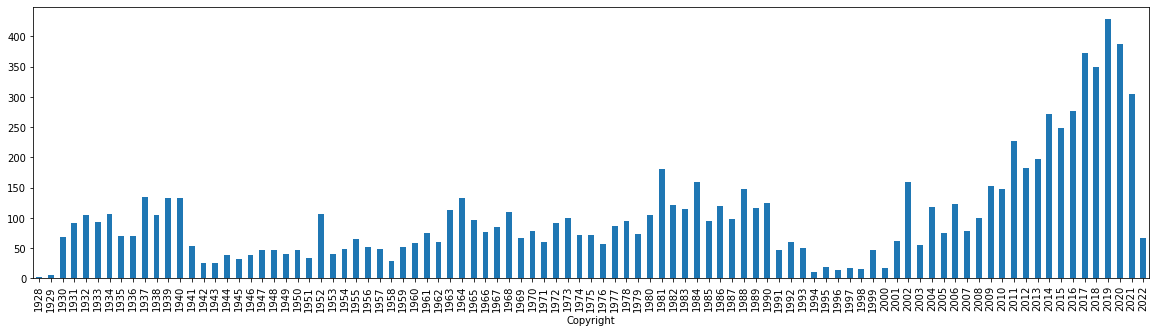

In [30]:
pisne.groupby("Copyright")["Píseň"].nunique().plot.bar(figsize=(20,5))

In [31]:
pisne.groupby("Film")["Píseň"].nunique().nlargest(20)

Film
Attila (402032)                                                 58
Motorband: Restart (401733)                                     51
EM a ON (184193)                                                49
Karel (402130)                                                  43
Vyšehrad Fylm (402232)                                          43
Meky (402064)                                                   39
Karel Svoboda – Šťastná léta (402028)                           37
Nechte zpívat Mišíka (401177)                                   37
Mstitel (402140)                                                33
Brak (12851)                                                    31
Jiří Suchý – Lehce s životem se prát (401980)                   31
King Skate (401786)                                             31
Barrandovské nokturno aneb Jak film tančil a zpíval (400328)    30
Lucie: Příběh jedný kapely (400894)                             30
Román pro muže (160436)                                  

In [33]:
pisne[pisne["Zpívá"] == "Helena Vondráčková (12227)"][["Film","Copyright","Píseň"]].sort_values(by="Copyright")

,Film,Copyright,Píseň
3972,Šíleně smutná princezna (396779),1968,Slza z tváře padá
3973,Šíleně smutná princezna (396779),1968,Já už to vím
3969,Šíleně smutná princezna (396779),1968,Znám jednu starou zahradu
3969,Šíleně smutná princezna (396779),1968,Znám jednu starou zahradu
3972,Šíleně smutná princezna (396779),1968,Slza z tváře padá
...,...,...,...
9169,Mstitel (402140),2021,Malovaný džbánku
9169,Mstitel (402140),2021,Malovaný džbánku
9169,Mstitel (402140),2021,Malovaný džbánku
9185,Mstitel (402140),2021,Ša-ba-du-ej


In [34]:
pisne[pisne["Zpívá"] == "Helena Vondráčková (12227)"].groupby("Píseň")["Film"].nunique().nlargest()

Píseň
Vyskoč, vstávej, k nám se dej    3
Ša-ba-du-ej                      3
Blázni v tom lítaj               2
Lásko má, já stůňu               2
Malovaný džbánku                 2
Name: Film, dtype: int64